# Singular Value Decomposition (SVD)
## Image Compression

In [1]:
#import packages we need 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.dates as mdate
import sklearn.metrics as skkmt
import sklearn.feature_selection as sfea
import requests
import warnings
warnings.filterwarnings('ignore')

In [2]:
# download the image

data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/i-rose-nm.jpg'
r = requests.get(data_url)
open('i-rose-nm.jpg', 'wb').write(r.content);

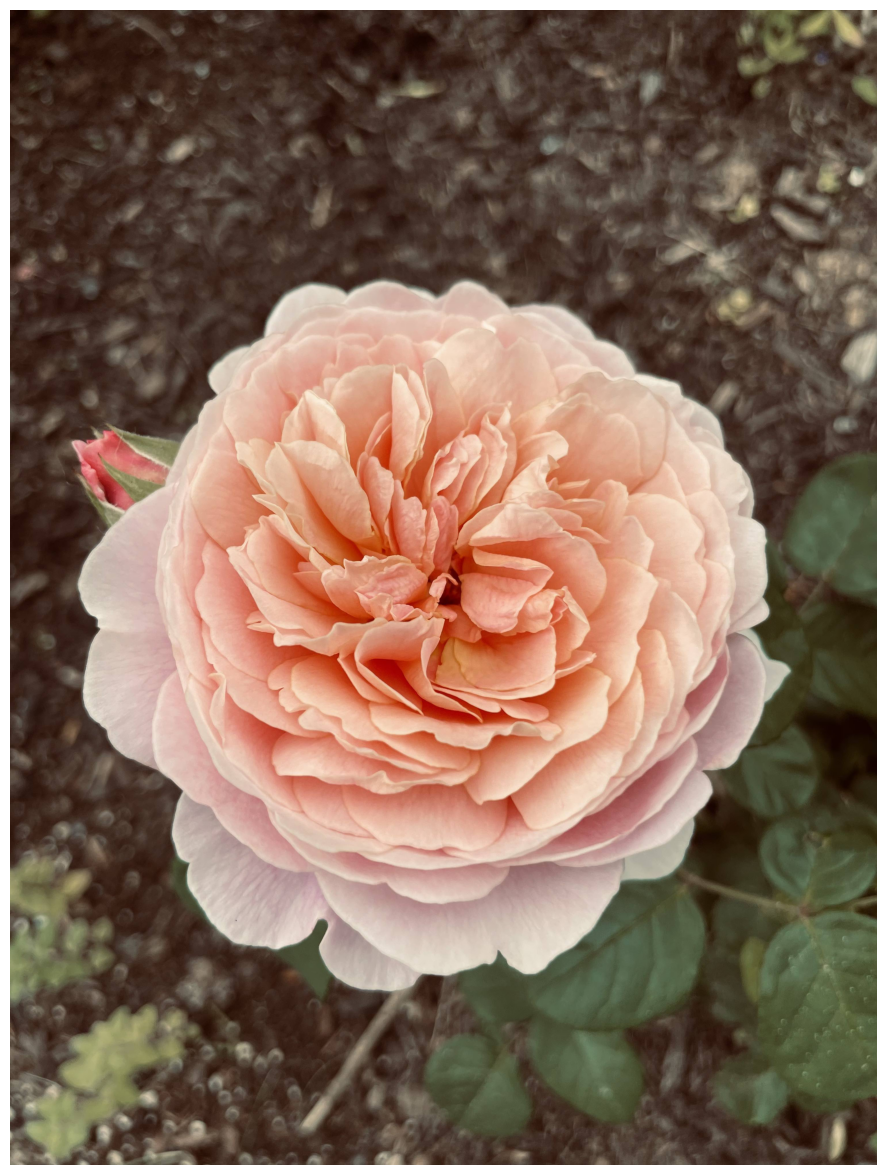

In [3]:
from matplotlib.image import imread
plt.figure(figsize=(12,15))
Rose = imread('i-rose-nm.jpg')
plt.imshow(Rose)
plt.axis('off')
plt.show()

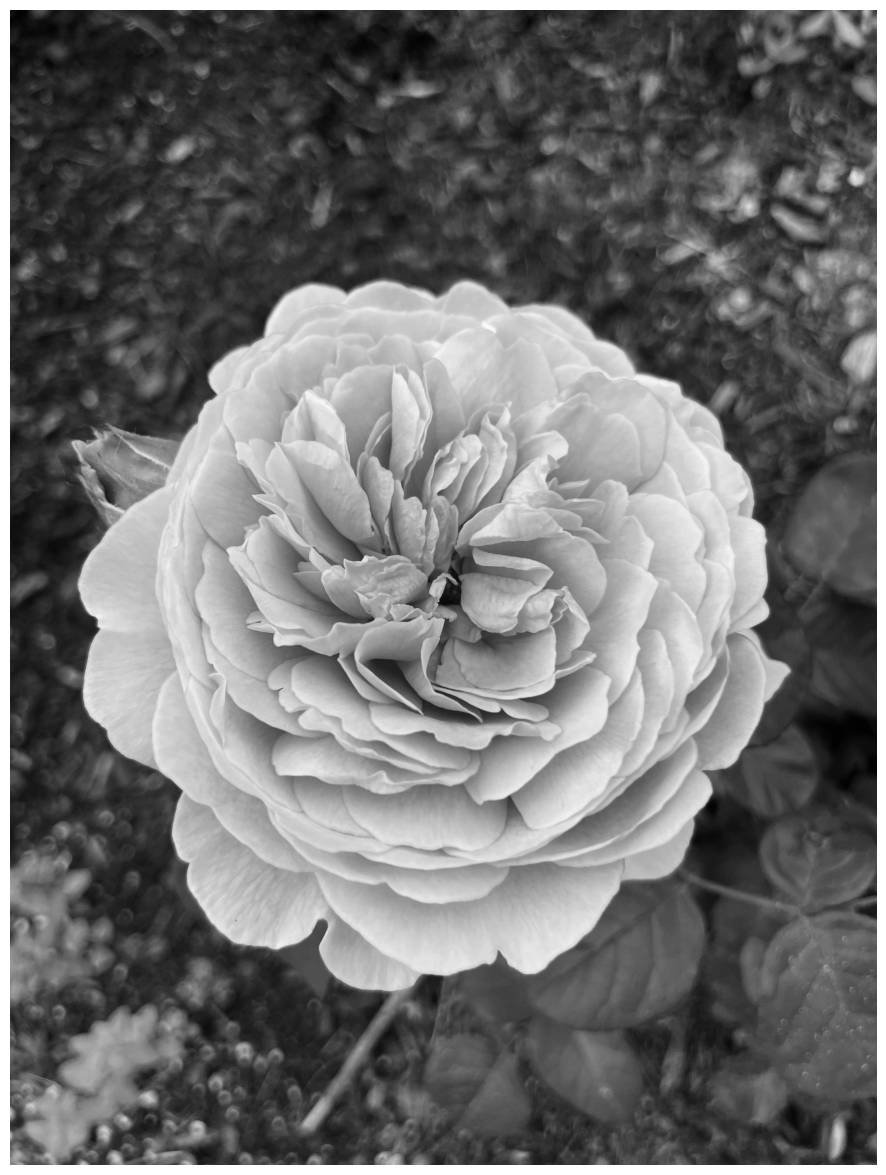

In [4]:
from skimage import color
#from skimage import io

plt.figure(figsize=(12,15))
Rose = color.rgb2gray(Rose)
plt.imshow(Rose,cmap='gray')
plt.axis('off')
plt.show()

In [5]:
[x_,y_] = Rose.shape
print(x_,y_)

4032 3024


In [6]:
U, S_v, Vt = np.linalg.svd(Rose,full_matrices=False)
S = np.diag(S_v)
cenergy=np.cumsum(S_v)/np.sum(np.sum(S_v))
xl=np.nonzero(cenergy>=0.95)[0][0]
print('The 95%% of the cummulative sum for the singular values occurs at k= %i' % xl ) 

The 95% of the cummulative sum for the singular values occurs at k= 855


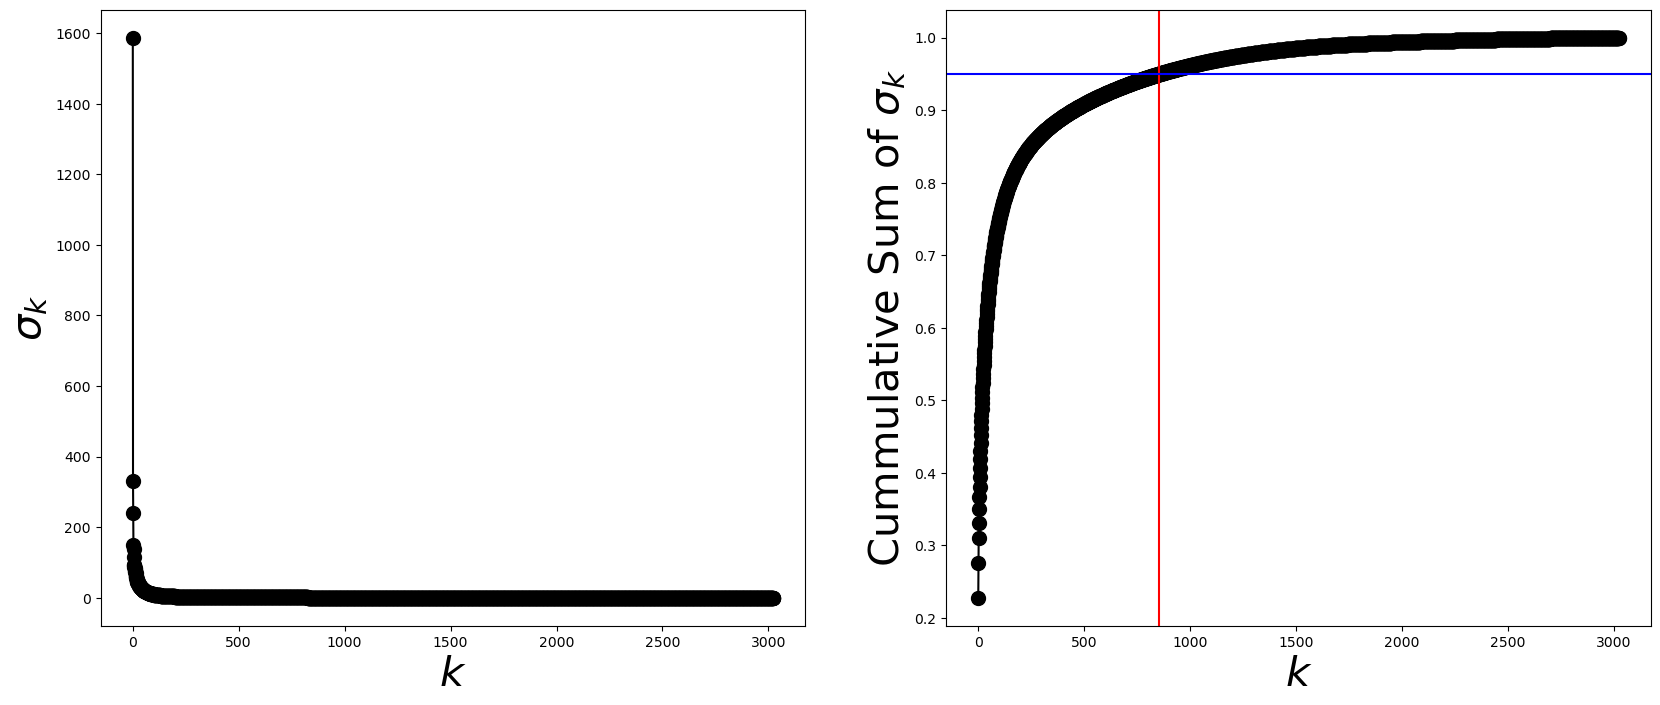

In [7]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1) 
plt.plot(S_v,marker='o',ms=10,color='k')
plt.xlabel(r'$k$',fontsize=30)
plt.ylabel(r'$\sigma_k$',fontsize=30)



plt.subplot(1,2,2) 
plt.plot(cenergy,marker='o',ms=10,color='k')
plt.axvline(x=xl,ymin=0,ymax=1.0,color='r')
plt.axhline(y=0.95,xmin=0,xmax=3500.0,color='b');
plt.xlabel(r'$k$',fontsize=30)
plt.ylabel(r'Cummulative Sum of $\sigma_k$',fontsize=30)
plt.show()

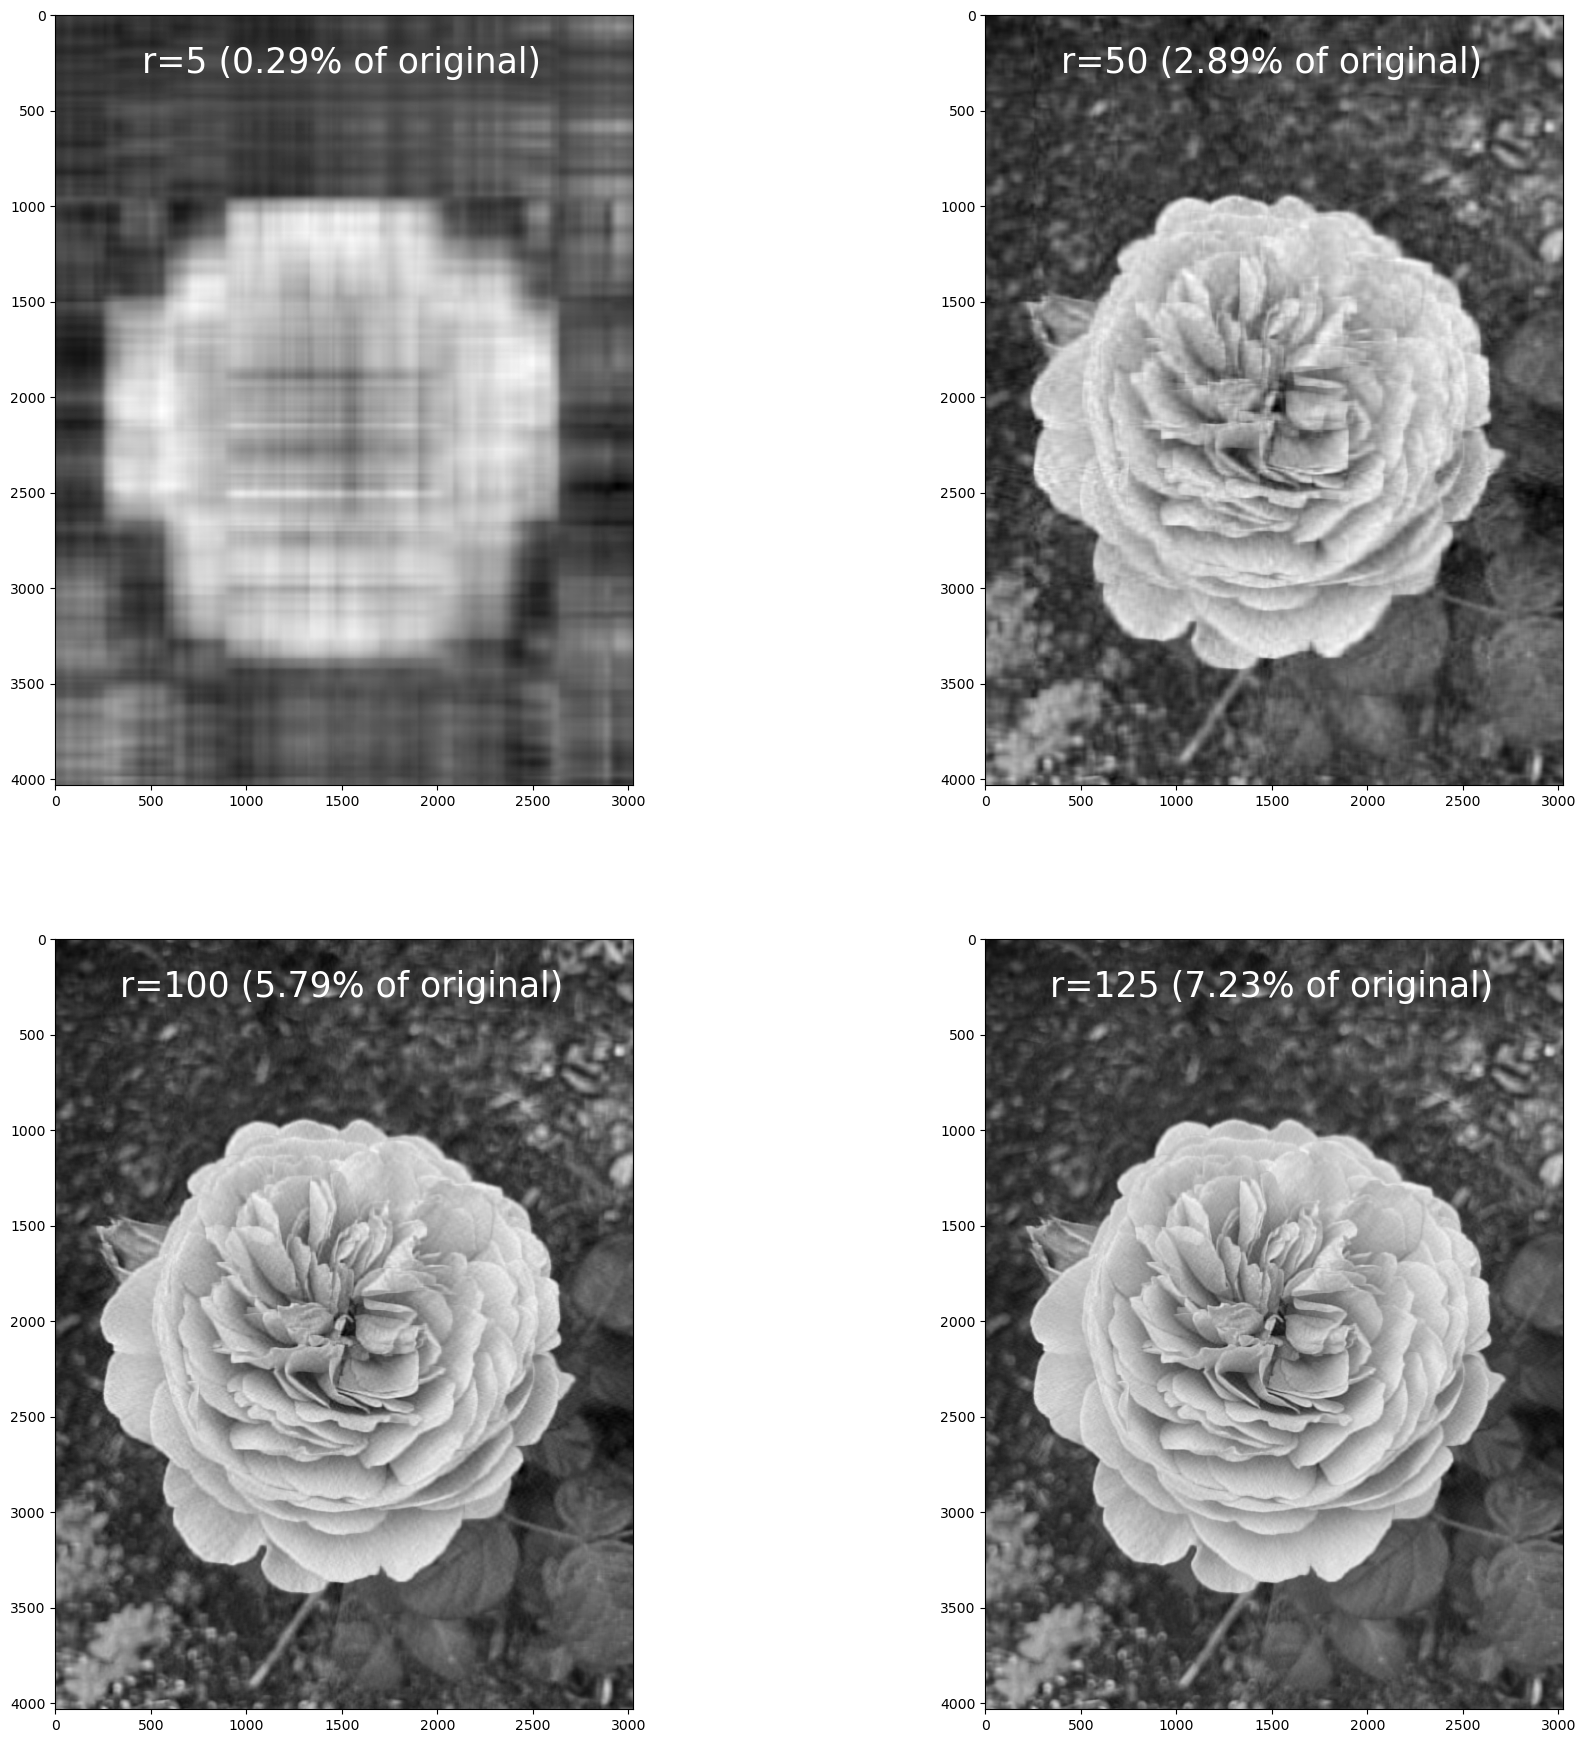

In [8]:
plt.figure(figsize=(22,22))


plt.subplot(2,2,1)
r=5 # r for truncation 
comp_per=((r*(x_+y_))/(x_ * y_))*100.0 #percentage of compression 
Tr_Rose = U[:,:r] @ S[0:r,:r] @ Vt[:r,:]  #matrix multiplication 
plt.imshow(Tr_Rose, cmap='gray')
plt.text(1500, 250, 'r=%i (%3.2f%% of original)' % (r,comp_per), ha="center", va="center", color="w",fontsize=25)



plt.subplot(2,2,2)
r=50 # r for truncation 
comp_per=((r*(x_+y_))/(x_ * y_))*100.0 #percentage of compression 
Tr_Rose = U[:,:r] @ S[0:r,:r] @ Vt[:r,:]  #matrix multiplication 
plt.imshow(Tr_Rose, cmap='gray')
plt.text(1500, 250, 'r=%i (%3.2f%% of original)' % (r,comp_per), ha="center", va="center", color="w",fontsize=25)


plt.subplot(2,2,3)
r=100 # r for truncation 
comp_per=((r*(x_+y_))/(x_ * y_))*100.0 #percentage of compression 
Tr_Rose = U[:,:r] @ S[0:r,:r] @ Vt[:r,:]  #matrix multiplication 
plt.imshow(Tr_Rose, cmap='gray')
plt.text(1500, 250, 'r=%i (%3.2f%% of original)' % (r,comp_per), ha="center", va="center", color="w",fontsize=25)

plt.subplot(2,2,4)
r=125 # r for truncation 
comp_per=((r*(x_+y_))/(x_ * y_))*100.0 #percentage of compression 
Tr_Rose = U[:,:r] @ S[0:r,:r] @ Vt[:r,:]  #matrix multiplication 
plt.imshow(Tr_Rose, cmap='gray')
plt.text(1500, 250, 'r=%i (%3.2f%% of original)' % (r,comp_per), ha="center", va="center", color="w",fontsize=25)




plt.show()

## PCA using SVD
### Iris Dataset

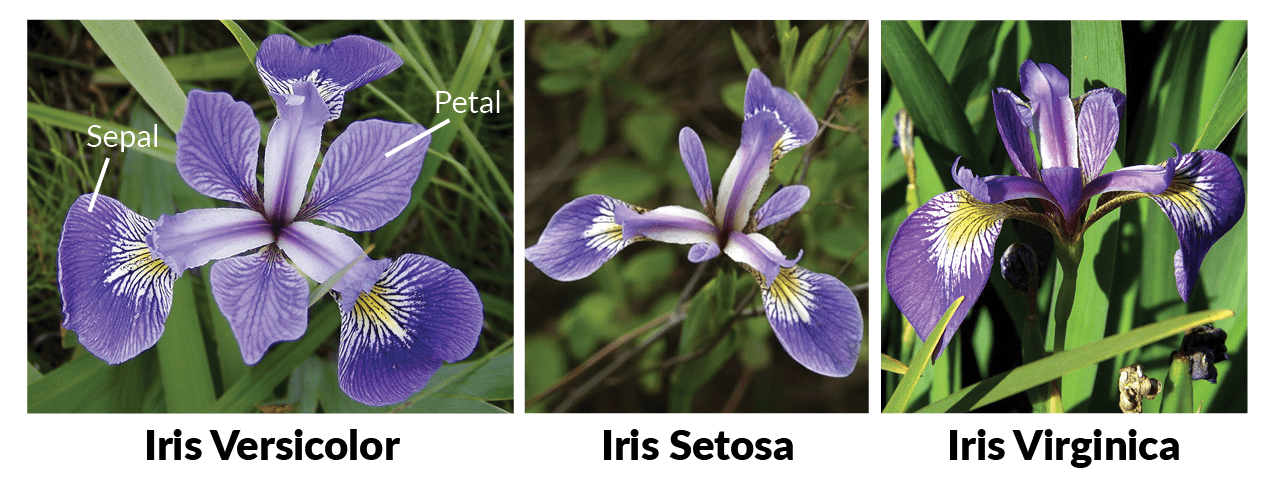

In [9]:
# download the image and display it
from IPython.display import Image

data_url='https://people.rit.edu/nxmsma/courses/webM689S23/data/iris-ds-pca.png'
r = requests.get(data_url)
open('iris-ds-pca.png', 'wb').write(r.content);



Image(filename='iris-ds-pca.png',width=1250) 

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
[dx,dy]=X.shape
xbar=np.ones((1,dy))*np.mean(X, axis=0)
Xmean=np.ones((dx,1))@xbar
B =X-Xmean

In [12]:
U, S_v, Vt = np.linalg.svd(B,full_matrices=False)
S = np.diag(S_v)
Tr = U[:,:3] @ S[0:3,:3] 

The 95% of the cummulative sum for the singular values occurs at k= 3


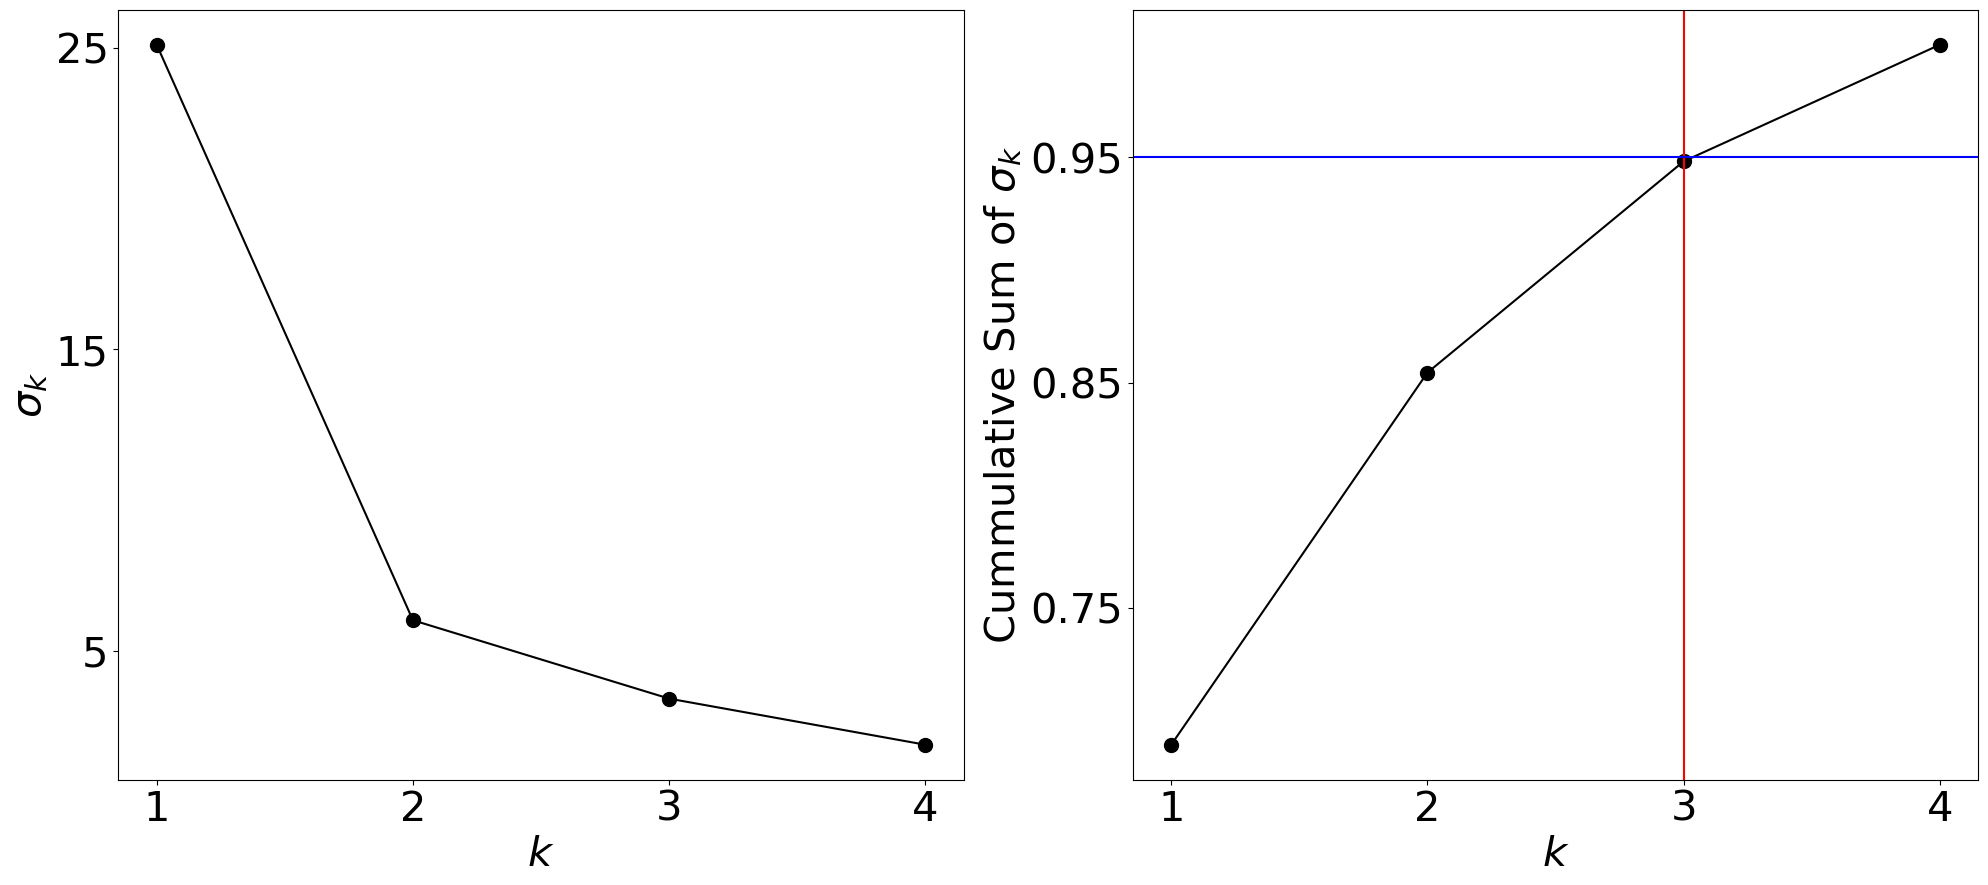

In [13]:
cenergy=np.cumsum(S_v)/np.sum(np.sum(S_v))
xl=np.nonzero(cenergy>=0.95)[0][0]


print('The 95%% of the cummulative sum for the singular values occurs at k= %i' % xl ) 


plt.figure(figsize=(24,10))
plt.subplot(1,2,1) 
plt.plot(np.arange(1,dy+1),S_v,marker='o',ms=10,color='k')
plt.xlabel(r'$k$',fontsize=30)
plt.ylabel(r'$\sigma_k$',fontsize=30)
plt.xticks([1,2,3,4],fontsize=30)
plt.yticks([5,15,25],fontsize=30)


plt.subplot(1,2,2) 
plt.plot(np.arange(1,dy+1),cenergy,marker='o',ms=10,color='k')
plt.axvline(x=xl,ymin=0,ymax=1.0,color='r')
plt.axhline(y=0.95,xmin=0,xmax=3500.0,color='b');
plt.xlabel(r'$k$',fontsize=30)
plt.ylabel(r'Cummulative Sum of $\sigma_k$',fontsize=30)
plt.xticks([1,2,3,4],fontsize=30) 
plt.yticks([0.75,0.85,0.95],fontsize=30)
plt.show()

<Figure size 2000x500 with 0 Axes>

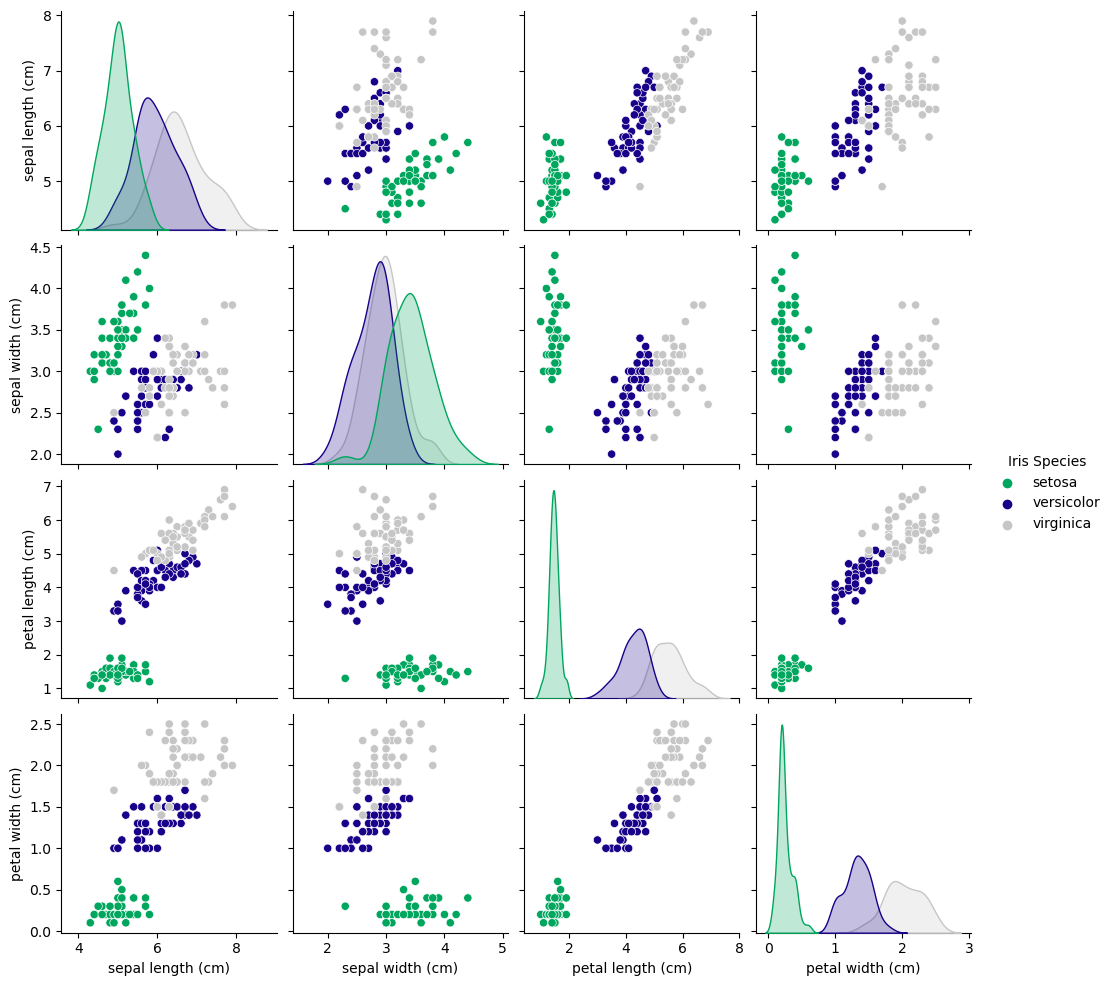

In [14]:
# Convert data into panda frames for seaborn plotting

import pandas as pd
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
data1=data1.astype({'target': 'int32'})
conditions=[(data1['target']== 0),(data1['target']== 1),(data1['target']== 2)]
values=[iris['target_names'][0],iris['target_names'][1],iris['target_names'][2]]
data1['Iris Species'] =np.select(conditions, values)
data1=data1.drop(columns=['target'])

import seaborn as sns
plt.figure(figsize=(20,5))
colors = ["#00a65e", "#190189","#c6c6c6"]
sns.set_palette(sns.color_palette(colors))
sns.pairplot(data1, hue="Iris Species");
plt.show()

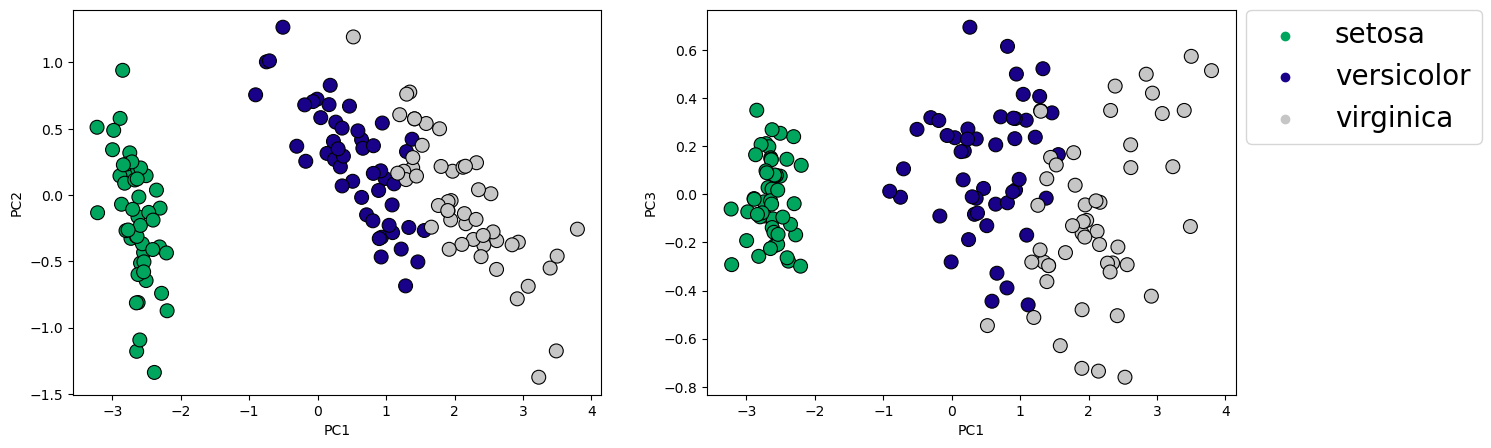

In [15]:
# Add PCA columns from the SVD

data1['PC1']=Tr[:, 0]
data1['PC2']=Tr[:, 1]
data1['PC3']=Tr[:, 2]
#data1['PC4']=Tr[:, 3]
#data1.head()



colors = ["#00a65e", "#190189","#c6c6c6"]
sns.set_palette(sns.color_palette(colors))


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
g=sns.scatterplot(x="PC1", y="PC2",data=data1, hue="Iris Species",s=100,legend=False,edgecolor='k')
plt.subplot(1,2,2)
g=sns.scatterplot(x="PC1", y="PC3",data=data1, hue="Iris Species",s=100,edgecolor='k')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0,fontsize=20)

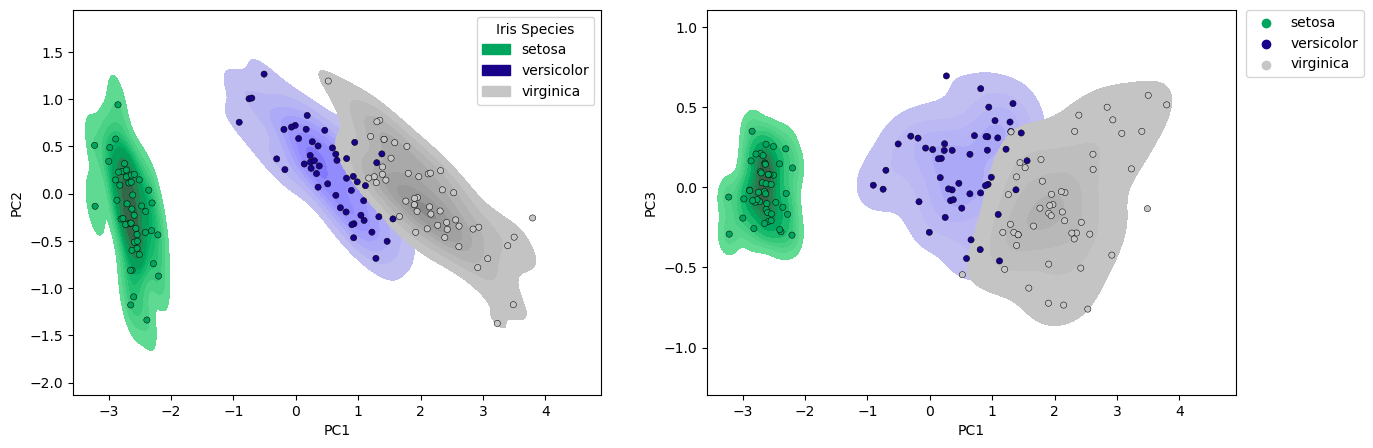

In [16]:
# Contour plots
plt.figure(figsize=(15,5))

colors = ["#00a65e", "#190189","#c6c6c6"]
sns.set_palette(sns.color_palette(colors))


plt.subplot(1,2,1)
sns.kdeplot(x="PC1", y="PC2",data=data1,hue="Iris Species",fill=True)
sns.scatterplot(x="PC1", y="PC2",data=data1, hue="Iris Species",s=20,legend=False,edgecolor='k')
plt.subplot(1,2,2)
sns.kdeplot(x="PC1", y="PC3",data=data1,hue="Iris Species",fill=True)
sns.scatterplot(x="PC1", y="PC3",data=data1, hue="Iris Species",s=20,edgecolor='k')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)